In [1]:
# RELATORIO PARA EXIBIÇÃO DE PROGRESSÃO DE VOTOS POR ANO

import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

eleicao_2016 = pd.read_excel('eleicao_vereador_2016_spa.xlsx')
eleicao_2020 = pd.read_excel('eleicao_vereador_2020_spa.xlsx')
eleicao_2024 = pd.read_excel('eleicao_vereador_2024_spa.xlsx')

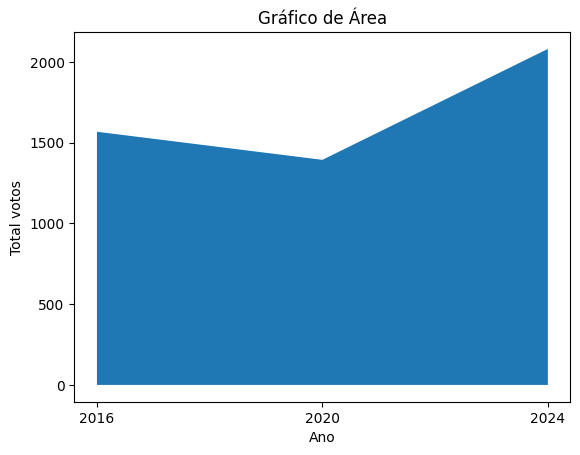

In [8]:
#Verificar quanto votos o candidato recebeu nas eleições de 2016 a 2024

#Criação de um dicionário para armazenar os resultados
resultatos_votos = {}

#Busca da soma de votos do candidado em cada ano
#2016
soma_voto = eleicao_2016[eleicao_2016['nr_votavel'] == 43123]['qt_votos'].sum()
resultatos_votos[43123] = {'2016': soma_voto}
#2020
soma_voto = eleicao_2020[eleicao_2020['nr_votavel'] == 77000]['qt_votos'].sum()
resultatos_votos[77000] = {'2020': soma_voto}
#2024
soma_voto = eleicao_2024[eleicao_2024['nr_votavel'] == 22333]['qt_votos'].sum()
resultatos_votos[22333] = {'2024':soma_voto}

#Conversão do dicionário para lista
resultados_lista = []
for nr_votavel, anos in resultatos_votos.items():
    for ano, total_votos in anos.items():
        resultados_lista.append({'ano': ano, 'nr_votavel': nr_votavel, 'total_votos': total_votos})

#DataFrame com as informações do total de votos de cada ano do candidato
resultados_df = pd.DataFrame(resultados_lista)
resultados_df


#Elabração do gráfico
x = resultados_df['ano']
y = resultados_df['total_votos']
plt.fill_between(x, y)
plt.xlabel('Ano')
plt.ylabel('Total votos')
plt.title('Gráfico de Área')
plt.show()

In [ ]:
#Criado DataFrame para filto de bairros dos locais de votação

secao_bairro = pd.read_excel('secao_bairro.xlsx')
colunas_para_remover = ['número da Zona', 'Município do local de votação', 'Seções instaladas']
secao_bairro.drop(columns=colunas_para_remover, axis=1,inplace=True)

#Remove as informações duplicadas
secao_bairro.drop_duplicates(inplace=True)
secao_bairro.rename(columns={'Nome do local de votação': 'nm_local_votacao', 'Bairro do local de votação': 'nm_bairro'}, inplace=True)
secao_bairro

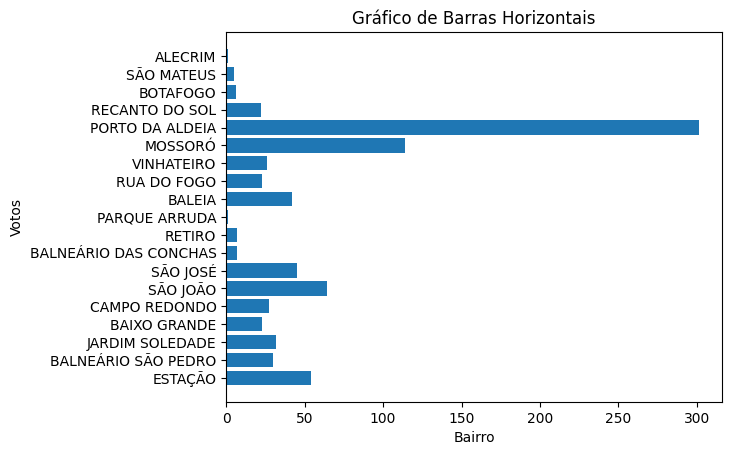

In [9]:
#Filtra o candidato na eleição de 2016
candidato = eleicao_2016[eleicao_2016['nr_votavel'] == 43123]
candidato2016 = candidato.merge(secao_bairro, on='nm_local_votacao')
t1 = ['nm_local_votacao','nm_bairro', 'nr_secao', 'nr_votavel', 'nm_votavel', 'qt_votos']
candidato2016 = candidato2016[t1]

# Criação de um dicionário para armazenar os resultados
resultados = {}

# Loop sobre cada valor único em nr_votavel
for bairro in candidato2016['nm_bairro'].unique():
    soma_votos = candidato2016[candidato2016['nm_bairro'] == bairro]['qt_votos'].sum()
    resultados[bairro] = soma_votos

# Convertendo o dicionário para um DataFrame
resultado_2016 = pd.DataFrame(list(resultados.items()), columns=['nm_bairro', 'total_votos'])
resultado_2016

#Elaboração de grafico de votos do ano de 2016
categorias = resultado_2016['nm_bairro']
valores = resultado_2016['total_votos']

plt.barh(categorias, valores)
plt.xlabel('Bairro')
plt.ylabel('Votos')
plt.title('Gráfico de Barras Horizontais')
plt.show()

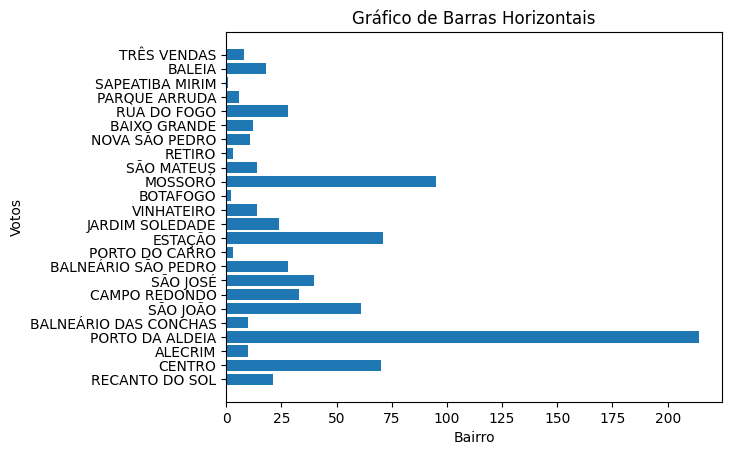

In [10]:
#Filtra o candidato na eleição de 2020
candidato = eleicao_2020[eleicao_2020['nr_votavel'] == 77000]
candidato2020 = candidato.merge(secao_bairro, on='nm_local_votacao')
t1 = ['nm_local_votacao','nm_bairro', 'nr_secao', 'nr_votavel', 'nm_votavel', 'qt_votos']
candidato2020 = candidato2020[t1]

# Criação de um dicionário para armazenar os resultados
resultados = {}

# Loop sobre cada valor único em nr_votavel
for bairro in candidato2020['nm_bairro'].unique():
    soma_votos = candidato2020[candidato2020['nm_bairro'] == bairro]['qt_votos'].sum()
    resultados[bairro] = soma_votos

# Convertendo o dicionário para um DataFrame
resultado_2020 = pd.DataFrame(list(resultados.items()), columns=['nm_bairro', 'total_votos'])
resultado_2020

#Elaboração de grafico de votos do ano de 2020
categorias = resultado_2020['nm_bairro']
valores = resultado_2020['total_votos']

plt.barh(categorias, valores)
plt.xlabel('Bairro')
plt.ylabel('Votos')
plt.title('Gráfico de Barras Horizontais')
plt.show()

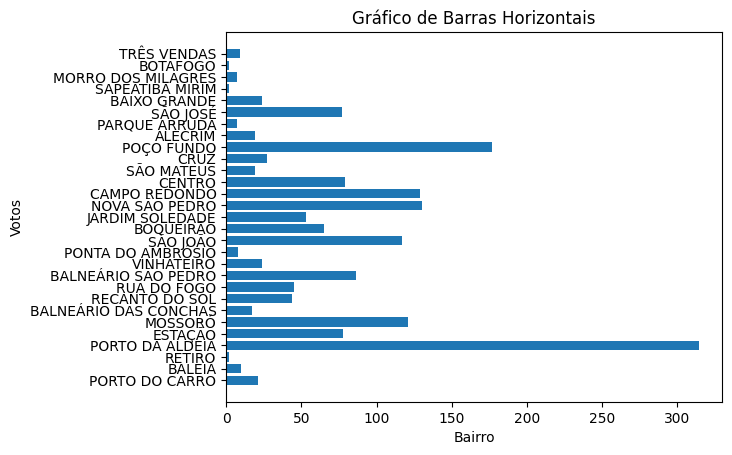

In [11]:
#Filtra o candidato na eleição de 2024
candidato = eleicao_2024[eleicao_2024['nr_votavel'] == 22333]
candidato2024 = candidato.merge(secao_bairro, on='nm_local_votacao')
t1 = ['nm_local_votacao','nm_bairro', 'nr_secao', 'nr_votavel', 'nm_votavel', 'qt_votos']
candidato2024 = candidato2024[t1]

# Criação de um dicionário para armazenar os resultados
resultados = {}

# Loop sobre cada valor único em nr_votavel
for bairro in candidato2024['nm_bairro'].unique():
    soma_votos = candidato2024[candidato2024['nm_bairro'] == bairro]['qt_votos'].sum()
    resultados[bairro] = soma_votos

# Convertendo o dicionário para um DataFrame
resultado_2024 = pd.DataFrame(list(resultados.items()), columns=['nm_bairro', 'total_votos'])
resultado_2024

#Elaboração de grafico de votos do ano de 2024
categorias = resultado_2024['nm_bairro']
valores = resultado_2024['total_votos']

plt.barh(categorias, valores)
plt.xlabel('Bairro')
plt.ylabel('Votos')
plt.title('Gráfico de Barras Horizontais')
plt.show()


In [ ]:
#Elaboração de grafico de votos mostrando os votos dos anos de 2024 juntos

resultado_2016['ano'] = 2016
resultado_2020['ano'] = 2020
resultado_2024['ano'] = 2024

resultados = pd.concat([resultado_2016, resultado_2020, resultado_2024], ignore_index=True)
resultados

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=resultados, x='nm_bairro', y='total_votos', hue='ano')

# Ajustes do gráfico
plt.xlabel('Bairro')
plt.ylabel('Total de Votos')
plt.title('Total de Votos por Bairro nos Anos de 2016, 2020 e 2024')
plt.legend(title='Ano')
plt.xticks(rotation=45)
plt.show()